In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb
from Lib_Midterm_Test import *

importing Jupyter notebook from Lib_Midterm_Test.ipynb


## 1. Read files

In [2]:
# Đọc từng thư mục, tạo dataframe của thư mục đó, concat 5 dataframe 
dirpath = 'Train/bbc_train/'
topics = ['business','entertainment','politics','sport','tech']

df = []
for topic in topics:
    df_topic = read_all_txt_files(dirpath, topic)
    df.append(df_topic)
df = pd.concat(df, ignore_index=True)

## 2. Data Exploration & Visualization

In [3]:
df.shape

(1854, 2)

In [4]:
df.head()

,content,topic
0,UK economy facing 'major risks'\n\nThe UK manu...,0
1,Asian quake hits European shares\n\nShares in ...,0
2,India power shares jump on debut\n\nShares in ...,0
3,Insurance bosses plead guilty\n\nAnother three...,0
4,Turkey-Iran mobile deal 'at risk'\n\nTurkey's ...,0


In [5]:
df.tail()

,content,topic
1849,Warning over Windows Word files\n\nWriting a M...,4
1850,Fast lifts rise into record books\n\nTwo high-...,4
1851,Nintendo adds media playing to DS\n\nNintendo ...,4
1852,Fast moving phone viruses appear\n\nSecurity f...,4
1853,Hacker threat to Apple's iTunes\n\nUsers of Ap...,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1854 non-null   object
 1   topic    1854 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.1+ KB


### ---Check for duplicates

In [7]:
# Check duplicate 
print(df.duplicated().sum())
# Check duplicate input
print(df.duplicated('content').sum())

78
78


In [8]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

### ---Visualization

0    424
3    422
2    339
4    305
1    286
Name: topic, dtype: int64


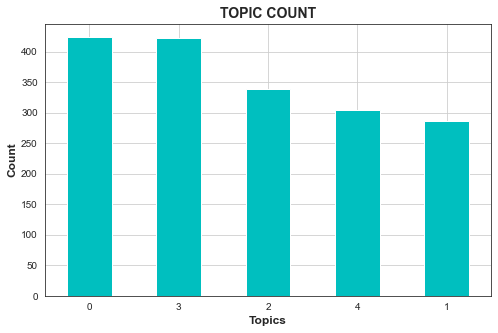

In [9]:
# Visualize class of topic
count = df.topic.value_counts()
print(count)

plt.figure(figsize=(8,5))
count.plot.bar(color='c')
plt.title('TOPIC COUNT',fontweight='bold', fontsize=14)
plt.xlabel('Topics', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.xticks(rotation=0)
plt.grid()
plt.show()

### Comment:
- Dữ liệu khá balance

## 3.Pre-processing

### ---Text cleaning 

In [10]:
# replace all characters which are not text & lowercase all words
df['content_clean'] = df.content.str.replace('[^a-zA-Z]',' ').str.lower()

In [11]:
# Check cleaned content
df.loc[0,'content_clean'][0:300]

'uk economy facing  major risks   the uk manufacturing sector will continue to face  serious challenges  over the next two years  the british chamber of commerce  bcc  has said   the group s quarterly survey of companies found exports had picked up in the last three months of      to their best level'

### ---Chọn stopwords từ WordCloud

In [37]:
# Visualize tần suất xuất hiện của từ bằng WordCloud theo từng topic
from wordcloud import WordCloud, STOPWORDS
wc_list = []
for i in range(len(topics)):
    text =  df[df['topic']==i]['content_clean']
    wc = WordCloud(
                 background_color='black',
                 max_words=1000)
    wc.generate(''.join(text))
    wc_list.append(wc)

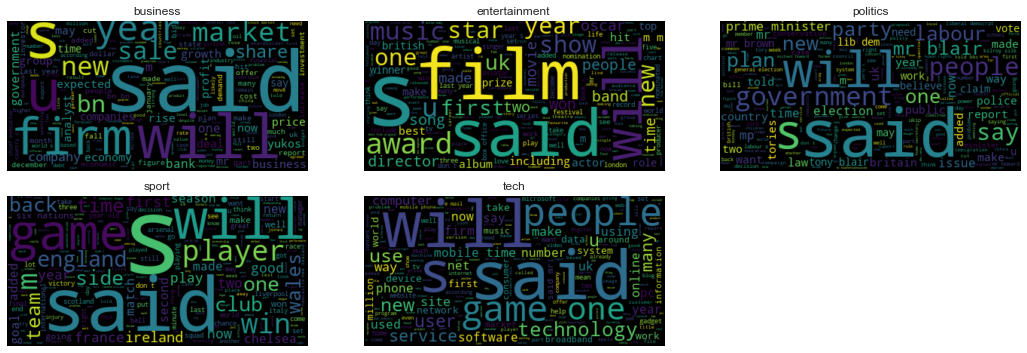

In [38]:
plt.figure(figsize=(15, 5))
for i in range(1,len(wc_list)+1):
    plt.subplot(2,3,i)
    plt.imshow(wc_list[i-1], interpolation='bilinear')
    plt.axis('off')
    plt.title(topics[i-1])
plt.tight_layout()
plt.show()

In [145]:
my_stopwords = ['said','wil','u','s','last year','year','one','bn','much','now','may','new','still','mr','december'
                ,'people','many','including', 'first', 'made', 'one','time','british','include','life', 'now',
               'make','added','way', 'wales','france','england','two','scotland','take','back'
                ,'think','good','number','home','use','million','offer','help','market','bbc','uk','set','concern'
                ,'found','little']

In [146]:
# Add những từ có tần suất xuất hiện cao nhưng mang nghĩa chung chung vào english_stop_words 
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(my_stopwords)

### ---Split data

In [22]:
#Input X
X = df['content_clean']
X.head()

0    uk economy facing  major risks   the uk manufa...
1    asian quake hits european shares  shares in eu...
2    india power shares jump on debut  shares in in...
3    insurance bosses plead guilty  another three u...
4    turkey iran mobile deal  at risk   turkey s in...
Name: content_clean, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# khoi tao TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(X)

In [25]:
# chuyển kết quả phân tích thành df
X = pd.DataFrame(X.toarray(), columns = tf.get_feature_names())
X.head()

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,aara,...,zones,zoom,zooms,zooropa,zornotza,zorro,zubair,zurich,zutons,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044613,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [26]:
#Output y
y = df['topic']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: topic, dtype: int64

In [27]:
X.shape, y.shape

((1776, 25837), (1776,))

In [28]:
#split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [29]:
X_train.shape , X_test.shape

((1420, 25837), (356, 25837))

In [30]:
y_train.shape, y_test.shape

((1420,), (356,))

## 4.Build Model

### ---Model selection

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

import time

In [32]:
# Thực hiện cross validation để chọn thuật toán phù hợp nhất
models = [LogisticRegression(), MultinomialNB(), GaussianNB(), KNeighborsClassifier()
            , RandomForestClassifier()]
scores = []
names = []
for model in models:
    scores.append(Average_Score_Model(model, X_train, y_train, size=0.25, cv=10))
    names.append(model.__class__.__name__)

In [33]:
df_scores = pd.DataFrame(scores, columns =['Score', 'Time Fit'], index=range(len(models)))
df_scores.insert(0,'Model',pd.Series(names))
df_scores.head()

,Model,Score,Time Fit
0,LogisticRegression,0.967324,8613.569641
1,MultinomialNB,0.909577,725.672436
2,GaussianNB,0.916338,1095.648670
3,KNeighborsClassifier,0.918028,288.696218
4,RandomForestClassifier,0.938873,3990.716529


In [34]:
# Cross Validation model với thuật toán XGBoost
Average_Score_Model(xgb.XGBClassifier(), X_train, y_train, size=0.25, cv=5)

(0.9464788732394366, 694415.3346538544)

In [36]:
# Cross Validation model với thuật toán SVM
Average_Score_Model(svm.SVC(), X_train, y_train, size=0.25, cv=5)

(0.9684507042253522, 31555.38058280945)

### Algorithm selection:
- Chọn thuật toán
    - LogisticRegression ----> vì Score cao (0.96), Time Fit không quá lâu
    - MultinomialNB, KNeighborsClassifier ----> vì Time Fit rất ngắn, Score tạm ổn (0.91)
- Không chọn thuật toán XGBoost, SVM ----> vì Time Fit quá cao và Score ko hơn các thuật toán trên

### ---Parameters Tuning  (Vectorizer & Model)
- Thực hiện parameters tuning trên 6 Pipeline:
    + pipe1: TfidfVectorizer & MultinomialNB
    + pipe2: TfidfVectorizer & LogisticRegression
    + pipe3: TfidfVectorizer & KNeighborsClassifier
    + pipe4: CountVectorizer & MultinomialNB
    + pipe5: CountVectorizer & LogisticRegression
    + pipe6: CountVectorizer & KNeighborsClassifier

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [46]:
#split lại train/test với X chưa thực hiện TfidfVectorizer
X = df['content_clean']
y = df['topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

#### ***Pipeline1,2,3 (TF-IDF & 3 selected models)***


In [112]:
#pipe1: TF-IDF & MultinomialNB

pipe1 = Pipeline(steps=[('bow', TfidfVectorizer()),
                        ('clf', MultinomialNB())
                       ])
pipe1_param = {'bow__sublinear_tf':[True, False],
                'bow__norm':['l1', 'l2'],
                'bow__min_df': [1,5,8,10,12],
                'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'clf__alpha': [1, 2, 0.01, 0.1, 0.5, 0.02, 10.0],
                'clf__fit_prior':[True, False]}
                
pipe1_tune = RandomizedSearchCV(pipe1, pipe1_param, cv=10)
pipe1_tune.fit(X_train, y_train)

print("Best parameters set:")
print(pipe1_tune.best_params_)

Best parameters set:
{'clf__fit_prior': True, 'clf__alpha': 0.02, 'bow__sublinear_tf': False, 'bow__norm': 'l2', 'bow__ngram_range': (1, 3), 'bow__min_df': 8}


In [132]:
#Tạo pipe với best_params_
pipe1 = Pipeline(steps=[
                        ('bow', TfidfVectorizer(sublinear_tf=False, norm='l2', ngram_range=(1, 3),
                                                max_df=8,stop_words=stop_words,encoding='latin-1')),
                        ('clf', MultinomialNB(fit_prior=True, alpha = 0.02))
                       ])
#Fit & Evaluate
start=time.time()
pipe1.fit(X_train, y_train)
end = time.time()
accuracy, recall, precision, f1 = static_score_model_class(y_test, pipe1.predict(X_test),'macro')

result1 = pd.DataFrame([end-start,pipe1.score(X_train, y_train),accuracy, recall, precision, f1]
                          ,index=['Time Fit','Train_Score','Test_Score','Test_Recall'
                                  ,'Test_Precision','Test_F1Score']
                          ,columns=['TF-IDF & MultinomialNB']).T
result1

,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
TF-IDF & MultinomialNB,3.987284,1.0,0.966292,0.969074,0.963677,0.965766


In [106]:
#pipe2: TF-IDF & LogisticRegression

pipe2 = Pipeline(steps=[
                        ('bow', TfidfVectorizer()),
                        ('clf', LogisticRegression())
                       ])
pipe2_param = {'bow__sublinear_tf':[True, False],
                'bow__norm':['l1', 'l2'],
                'bow__min_df': [1,5,8,10,12],
                'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'clf__solver':['newton-cg', 'sag', 'saga'],
                'clf__penalty':['none', 'l2']}

pipe2_tune = RandomizedSearchCV(pipe2, pipe2_param, cv=10)
pipe2_tune.fit(X_train, y_train)

print("Best parameters set:")
print(pipe2_tune.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library

Best parameters set:
{'clf__solver': 'newton-cg', 'clf__penalty': 'none', 'bow__sublinear_tf': True, 'bow__norm': 'l1', 'bow__ngram_range': (1, 2), 'bow__min_df': 8}


In [136]:
#Tạo pipe với best_params_
# Best parameters set:
# {'clf__solver': 'newton-cg', 'clf__penalty': 'none', 'bow__sublinear_tf': True, 'bow__norm': 'l1', 
#  'bow__ngram_range': (1, 2), 'bow__min_df': 8}

pipe2 = Pipeline(steps=[('bow', TfidfVectorizer(sublinear_tf=True, norm='l1', ngram_range=(1, 2), min_df=8
                                                ,stop_words=stop_words,encoding='latin-1')),
                        ('clf', LogisticRegression(solver='newton-cg', penalty='none'))
                       ])

#Fit & Evaludate
start=time.time()
pipe2.fit(X_train, y_train)
end = time.time()
accuracy, recall, precision, f1 = static_score_model_class(y_test, pipe2.predict(X_test),'macro')

result2 = pd.DataFrame([end-start,pipe2.score(X_train, y_train),accuracy, recall, precision, f1]
                          ,index=['Time Fit','Train_Score','Test_Score','Test_Recall'
                                  ,'Test_Precision','Test_F1Score']
                          ,columns=['TF-IDF & LogisticRegression']).T
result2

,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
TF-IDF & LogisticRegression,1.938921,1.0,0.980337,0.982941,0.979395,0.980786


In [107]:
#pipe3: TF-IDF & KNeighborsClassifier
pipe3 = Pipeline(steps=[('bow', TfidfVectorizer()),
                        ('clf', KNeighborsClassifier())
                       ])
pipe3_param = {'bow__sublinear_tf':[True, False],
                'bow__norm':['l1', 'l2'],
                'bow__min_df': [1,5,8,10,12],
                'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'clf__weights':['uniform', 'distance'],
                'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'clf__n_jobs': [-1],
                'clf__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                'clf__leaf_size': (20,40,1),
                'clf__p': [1,2],
                'clf__metric': ['minkowski', 'chebyshev']
                }

pipe3_tune = RandomizedSearchCV(pipe3, pipe3_param, cv=10)
pipe3_tune.fit(X_train, y_train)

print("Best parameters set:")
print(pipe3_tune.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sk

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sk

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklear

Best parameters set:
{'clf__weights': 'uniform', 'clf__p': 2, 'clf__n_neighbors': 19, 'clf__n_jobs': -1, 'clf__metric': 'minkowski', 'clf__leaf_size': 20, 'clf__algorithm': 'kd_tree', 'bow__sublinear_tf': True, 'bow__norm': 'l2', 'bow__ngram_range': (1, 1), 'bow__min_df': 8}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


In [137]:
#Tạo pipe với best_params_
# Best parameters set:
# {'clf__weights': 'uniform', 'clf__p': 2, 'clf__n_neighbors': 19, 'clf__n_jobs': -1, 
#  'clf__metric': 'minkowski', 'clf__leaf_size': 20, 'clf__algorithm': 'kd_tree', 
#  'bow__sublinear_tf': True, 'bow__norm': 'l2', 'bow__ngram_range': (1, 1), 'bow__min_df': 8}

pipe3 = Pipeline(steps=[('bow', TfidfVectorizer(sublinear_tf=True, norm='l2', ngram_range=(1, 1), min_df=8)),
                        ('clf', KNeighborsClassifier(weights='uniform', p=2, n_neighbors=19, n_jobs= -1, 
                                        metric='minkowski', leaf_size=20, algorithm='kd_tree'))
                       ])
#Fit & Evaludate
start=time.time()
pipe3.fit(X_train, y_train)
end = time.time()
accuracy, recall, precision, f1 = static_score_model_class(y_test, pipe3.predict(X_test),'macro')

result3 = pd.DataFrame([end-start,pipe3.score(X_train, y_train),accuracy, recall, precision, f1]
                          ,index=['Time Fit','Train_Score','Test_Score','Test_Recall'
                                  ,'Test_Precision','Test_F1Score']
                          ,columns=['TF-IDF & KNeighborsClassifier']).T
result3

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
TF-IDF & KNeighborsClassifier,0.607518,0.969014,0.960674,0.963213,0.959177,0.960534


#### ***Pipeline 4,5,6 (CountVectorizer & 3 selected models)***

In [108]:
# pipe4: CountVectorizer & MultinomialNB
pipe4 = Pipeline(steps=[('bow', CountVectorizer()),
                        ('clf', MultinomialNB())
                       ])
pipe4_param = {'bow__min_df': [1,5,8,10,12],
                'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'bow__strip_accents' : ['ascii', 'unicode'],
                'bow__tokenizer' : [callable, None],
                'clf__alpha': [1, 2, 0.01, 0.1, 0.5, 0.02, 10.0],
                'clf__fit_prior':[True, False]}

pipe4_tune = RandomizedSearchCV(pipe4, pipe4_param, cv=10)
pipe4_tune.fit(X_train, y_train)

print("Best parameters set:")
print(pipe4_tune.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

Best parameters set:
{'clf__fit_prior': True, 'clf__alpha': 0.5, 'bow__tokenizer': None, 'bow__strip_accents': 'ascii', 'bow__ngram_range': (1, 2), 'bow__min_df': 12}


In [140]:
#Tạo pipe với best_params_
# Best parameters set:
# {'clf__fit_prior': True, 'clf__alpha': 0.5, 'bow__tokenizer': None,
#  'bow__strip_accents': 'ascii', 'bow__ngram_range': (1, 2), 'bow__min_df': 12}

pipe4 = Pipeline(steps=[
                        ('bow', CountVectorizer(tokenizer=None,strip_accents='ascii',ngram_range=(1, 2)
                                                ,min_df=12,stop_words=stop_words,encoding='latin-1')),
                        ('clf', MultinomialNB(fit_prior=True, alpha=0.5))
                       ])
#Fit & Evaludate
start=time.time()
pipe4.fit(X_train, y_train)
end = time.time()
accuracy, recall, precision, f1 = static_score_model_class(y_test, pipe4.predict(X_test),'macro')

result4 = pd.DataFrame([end-start,pipe4.score(X_train, y_train),accuracy, recall, precision, f1]
                          ,index=['Time Fit','Train_Score','Test_Score','Test_Recall'
                                  ,'Test_Precision','Test_F1Score']
                          ,columns=['CountVectorizer & MultinomialNB']).T
result4

,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
CountVectorizer & MultinomialNB,1.913298,0.990845,0.963483,0.964998,0.961755,0.962776


In [109]:
#pipe5: CountVectorizer & LogisticRegression
pipe5 = Pipeline(steps=[
                        ('bow', CountVectorizer()),
                        ('clf', LogisticRegression())
                       ])
pipe5_param = {'bow__min_df': [1,5,8,10,12],
                'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'bow__strip_accents' : ['ascii', 'unicode'],
                'bow__tokenizer' : [callable, None],
                'clf__solver':['newton-cg', 'sag', 'saga'],
                'clf__penalty':['none', 'l2']}     

pipe5_tune = RandomizedSearchCV(pipe5, pipe5_param, cv=10)
pipe5_tune.fit(X_train, y_train)

print("Best parameters set:")
print(pipe5_tune.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library

Best parameters set:
{'clf__solver': 'newton-cg', 'clf__penalty': 'l2', 'bow__tokenizer': None, 'bow__strip_accents': 'ascii', 'bow__ngram_range': (1, 2), 'bow__min_df': 10}


In [141]:
#Tạo pipe với best_params_
pipe5 = Pipeline(steps=[
                        ('bow', CountVectorizer(tokenizer=None, strip_accents='unicode',ngram_range=(1, 3)
                                                ,min_df= 5,stop_words=stop_words,encoding='latin-1')),
                        ('clf', LogisticRegression(solver='newton-cg', penalty='none'))
                       ])
#Fit & Evaludate
start=time.time()
pipe5.fit(X_train, y_train)
end = time.time()
accuracy, recall, precision, f1 = static_score_model_class(y_test, pipe5.predict(X_test),'macro')

result5 = pd.DataFrame([end-start,pipe5.score(X_train, y_train),accuracy, recall, precision, f1]
                          ,index=['Time Fit','Train_Score','Test_Score','Test_Recall'
                                  ,'Test_Precision','Test_F1Score']
                          ,columns=['CountVectorizer & LogisticRegression']).T
result5

,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
CountVectorizer & LogisticRegression,2.446336,1.0,0.963483,0.963714,0.962035,0.962823


In [125]:
#pipe6: CountVectorizer & KNeighborsClassifier
pipe6 = Pipeline(steps=[('bow', CountVectorizer()),
                        ('clf', KNeighborsClassifier())
                       ])
pipe6_param = {'bow__min_df': [1,5,8,10,12],
                'bow__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'bow__strip_accents' : ['ascii', 'unicode'],
                'bow__tokenizer' : [callable, None],
                'clf__weights':['uniform', 'distance'],
                'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'clf__n_jobs': [-1],
                'clf__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                'clf__leaf_size': (20,40,1),
                'clf__p': [1,2],
                'clf__metric': ['minkowski', 'chebyshev']
                }

pipe6_tune = RandomizedSearchCV(pipe6, pipe6_param, cv=10)
pipe6_tune.fit(X_train, y_train)

print("Best parameters set:")
print(pipe6_tune.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Library/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklear

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklear

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 471, in _fit
    % (self.effectiv

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 471, in _fit
    % (self.effectiv

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neighbors/_base.py", line 471, in _fit
    % (self.effectiv

Best parameters set:
{'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 2, 'clf__n_jobs': -1, 'clf__metric': 'minkowski', 'clf__leaf_size': 40, 'clf__algorithm': 'auto', 'bow__tokenizer': None, 'bow__strip_accents': 'unicode', 'bow__ngram_range': (1, 1), 'bow__min_df': 10}


In [143]:
#Tạo pipe với best_params_
# Best parameters set:
# {'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 2, 'clf__n_jobs': -1, 
#  'clf__metric': 'minkowski', 'clf__leaf_size': 40, 'clf__algorithm': 'auto', 'bow__tokenizer': None, 
#  'bow__strip_accents': 'unicode', 'bow__ngram_range': (1, 1), 'bow__min_df': 10}
pipe6 = Pipeline(steps=[
                        ('bow', CountVectorizer(tokenizer=None, strip_accents='unicode',ngram_range=(1, 1)
                                                ,min_df= 10,stop_words=stop_words,encoding='latin-1')),
                        ('clf',  KNeighborsClassifier(weights='distance', p=1, n_neighbors=2, n_jobs=-1, 
                                                      metric='minkowski', leaf_size=40, algorithm='auto'))
                       ])

#Fit & Evaludate
start=time.time()
pipe6.fit(X_train, y_train)
end = time.time()
accuracy, recall, precision, f1 = static_score_model_class(y_test, pipe6.predict(X_test),'macro')

result6 = pd.DataFrame([end-start,pipe6.score(X_train, y_train),accuracy, recall, precision, f1]
                          ,index=['Time Fit','Train_Score','Test_Score','Test_Recall'
                                  ,'Test_Precision','Test_F1Score']
                          ,columns=['CountVectorizer & KNeighborsClassifier']).T
result6

,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
CountVectorizer & KNeighborsClassifier,0.596885,1.0,0.58427,0.551564,0.837645,0.579349


In [144]:
# Lập bảng kết quả để đối chiếu
df_result = pd.concat([result1,result2,result3,result4,result5,result6])
df_result

,Time Fit,Train_Score,Test_Score,Test_Recall,Test_Precision,Test_F1Score
TF-IDF & MultinomialNB,3.987284,1.000000,0.966292,0.969074,0.963677,0.965766
TF-IDF & LogisticRegression,1.938921,1.000000,0.980337,0.982941,0.979395,0.980786
TF-IDF & KNeighborsClassifier,0.607518,0.969014,0.960674,0.963213,0.959177,0.960534
CountVectorizer & MultinomialNB,1.913298,0.990845,0.963483,0.964998,0.961755,0.962776
CountVectorizer & LogisticRegression,2.446336,1.000000,0.963483,0.963714,0.962035,0.962823
CountVectorizer & KNeighborsClassifier,0.596885,1.000000,0.584270,0.551564,0.837645,0.579349


### Kết luận:
- Từ bảng trên ta thấy:
    + Model sử dụng "CountVectorizer & KNeighborsClassifier" có score trên Train 100%, nhưng trên Test chỉ 58% => có hiện tượng overfitting.
    + Model sử dụng "TF-IDF & LogisticRegression" cho kết quả rất tốt trên Train (100%) và Test (98%), cho thấy mô hình phù hợp với dữ liệu. Precision, Recall, F1 Score của Model này cũng rất cao và cao nhất so với các Model còn lại => Model có thể predict các class rất tốt.
-=> Chọn Model sử dụng "TF-IDF & LogisticRegression"

## 5. Save model

In [147]:
# Add class Pre_Process() to pipe2 (TF-IDF & LogisticRegression)
final_pipe = Pipeline(steps=[('pre_process',Pre_Process()),
                            ('bow', TfidfVectorizer(stop_words=stop_words,encoding='latin-1',
                                                    sublinear_tf=True, norm='l1', ngram_range=(1, 2), min_df=8)),
                            ('clf', LogisticRegression(solver='newton-cg', penalty='none'))
                       ])

Khoi tao doi tuong Data Pre_Processing


In [148]:
# Fit final_pipe on training set
final_pipe.fit(X_train, y_train)

Vao lenh Fit
Vao lenh Transform


Pipeline(steps=[('pre_process', Pre_Process()),
                ('bow',
                 TfidfVectorizer(encoding='latin-1', min_df=8,
                                 ngram_range=(1, 2), norm='l1',
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'added',
                                                       'after', 'afterwards',
                                                       'again', 'against',
                                                       'all', 'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                             

In [150]:
import pickle
# Save to file in the current working directory 

pkl_filename = "bbc_model_DamThiMinhPhuong_K269.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(final_pipe, file)